In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"C:\Users\hi\Downloads\autos.txt")
datac=data.copy()
datac.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


## Analysis-1

### 1) Perform general Data analysis

In [3]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [4]:
datac["dateCrawled"]=pd.to_datetime(datac["dateCrawled"])
datac["dateCreated"]=pd.to_datetime(datac["dateCreated"])
datac["lastSeen"]=pd.to_datetime(datac["lastSeen"])

In [3]:
datac.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [81]:
datac.fillna({"notRepairedDamage":data["notRepairedDamage"].mode()[0],"fuelType":data["fuelType"].mode()[0],"vehicleType":data["vehicleType"].mode()[0],"gearbox":data["gearbox"].mode()[0],"model":data["model"].mode()[0]},inplace=True)

In [6]:
datac[datac.duplicated()]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
179448,2016-03-08 18:42:48,Mercedes_Benz_CLK_Coupe_230_Kompressor_Sport,privat,Angebot,1799,test,coupe,1999,automatik,193,clk,20000,7,benzin,mercedes_benz,nein,2016-03-08,0,89518,2016-03-09 09:46:57
242556,2016-03-28 00:56:10,Suzuki_Ignis,privat,Angebot,1000,control,kleinwagen,2002,manuell,83,andere,150000,1,benzin,suzuki,nein,2016-03-28,0,66589,2016-03-28 08:46:21
270719,2016-04-03 09:01:15,Mercedes_Benz_CLK_320_W209,privat,Angebot,4699,test,coupe,2003,automatik,218,clk,125000,6,benzin,mercedes_benz,ja,2016-04-03,0,75196,2016-04-07 09:44:54
341474,2016-03-18 18:46:15,Volkswagen_Passat_Variant_1.9_TDI_Highline,privat,Angebot,1999,control,kombi,2001,manuell,131,passat,150000,7,diesel,volkswagen,nein,2016-03-18,0,36391,2016-03-18 18:46:15


In [7]:
datac.drop_duplicates(inplace=True)

In [8]:
datac.drop(["nrOfPictures"],axis=1,inplace=True)

In [9]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371524 entries, 0 to 371527
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dateCrawled          371524 non-null  datetime64[ns]
 1   name                 371524 non-null  object        
 2   seller               371524 non-null  object        
 3   offerType            371524 non-null  object        
 4   price                371524 non-null  int64         
 5   abtest               371524 non-null  object        
 6   vehicleType          371524 non-null  object        
 7   yearOfRegistration   371524 non-null  int64         
 8   gearbox              371524 non-null  object        
 9   powerPS              371524 non-null  int64         
 10  model                371524 non-null  object        
 11  kilometer            371524 non-null  int64         
 12  monthOfRegistration  371524 non-null  int64         
 13  fuelType      

In [10]:
datac

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,limousine,1993,manuell,0,golf,150000,0,benzin,volkswagen,nein,2016-03-24,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,golf,125000,5,diesel,audi,ja,2016-03-24,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,nein,2016-03-14,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,limousine,2005,manuell,0,golf,20000,1,benzin,sonstige_autos,nein,2016-03-14,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,nein,2016-03-20,40764,2016-03-24 12:45:21


### 2)Can you tell me the Distribution of Vehicles based on Year of Registration with the help of a plot

In [11]:
datac["yearOfRegistration"]=datac["yearOfRegistration"].where((datac["yearOfRegistration"]>=1950) & (datac["yearOfRegistration"]<=2023),datac["yearOfRegistration"].mode()[0])

In [12]:
datac["yearOfRegistration"].value_counts()

2000    24954
1999    22766
2005    22316
2006    20230
2001    20217
        ...  
1950       22
1951       19
1953       18
1954       16
1952       12
Name: yearOfRegistration, Length: 70, dtype: int64

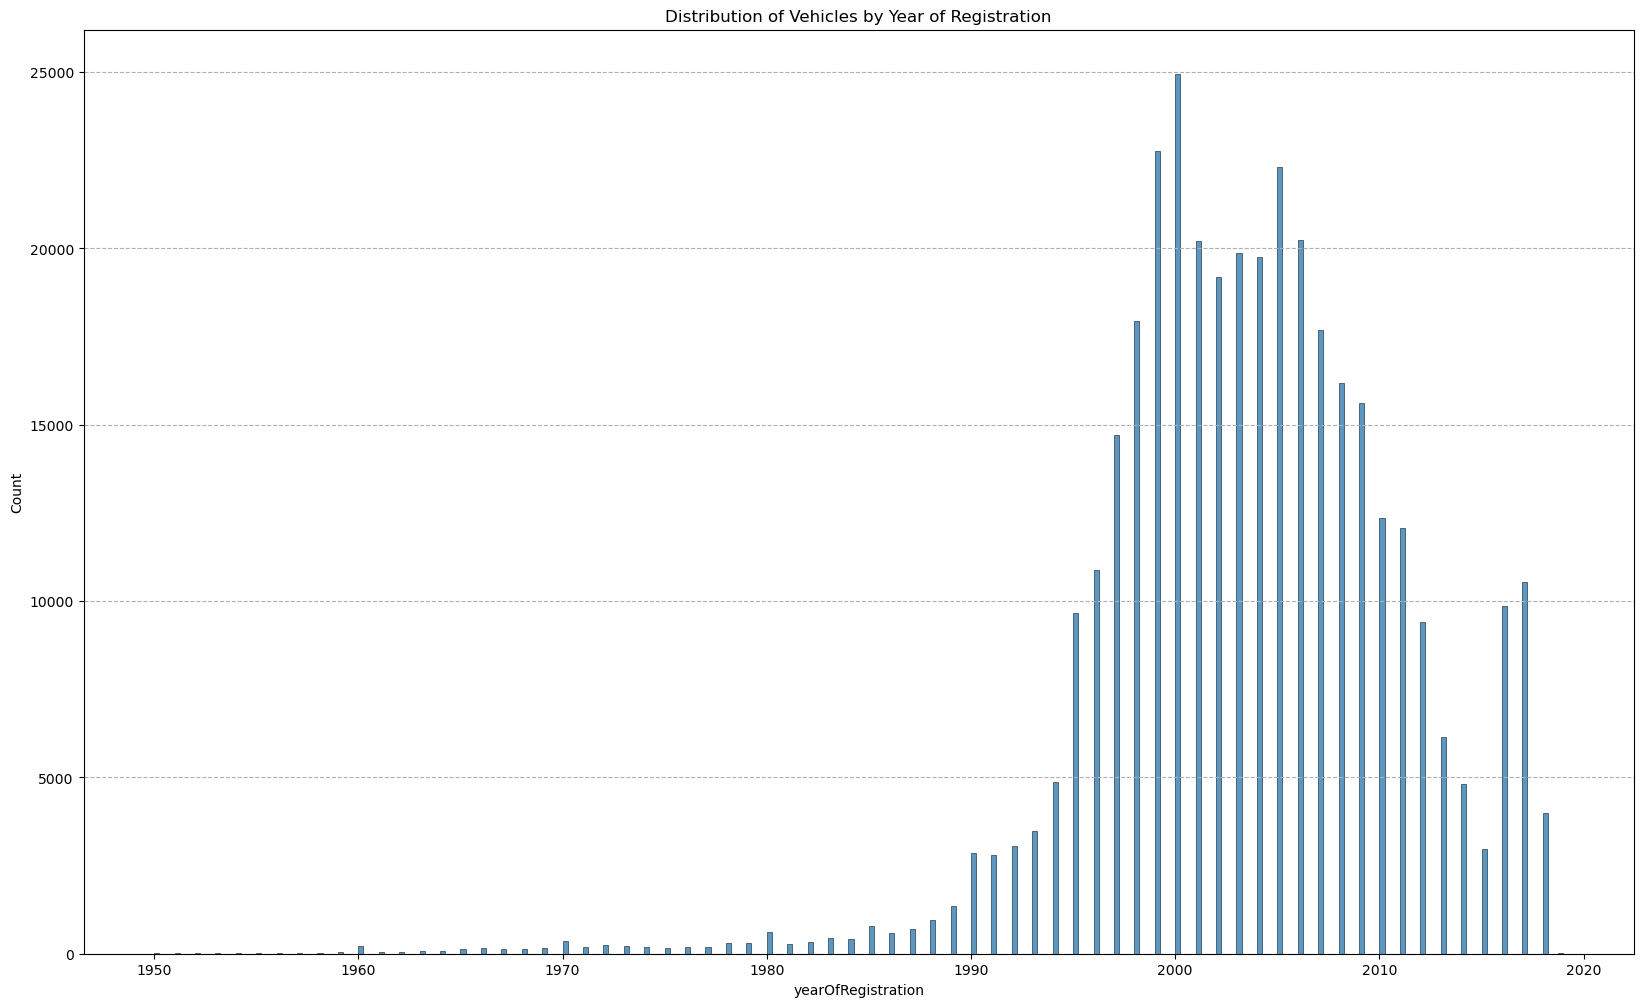

In [16]:
plt.figure(figsize=(20, 12))
sns.histplot(data=datac, x=datac["yearOfRegistration"])
plt.title("Distribution of Vehicles by Year of Registration")
plt.grid(axis='y', linestyle='--')
plt.show()

### 3) Create a plot based on the Variation of the price range by the vehicle type

In [78]:
datac.groupby("vehicleType")["price"].agg(['mean', 'median', 'std', 'min', 'max'])

,mean,median,std,min,max
vehicleType,,,,,
andere,677328.957700,2299.0,3.710417e+07,0,2147483647
bus,10302.742956,4500.0,5.783239e+05,0,99999999
cabrio,15066.444013,6400.0,6.610357e+05,0,99999999
coupe,25961.682040,5250.0,1.040416e+06,0,99999999
kleinwagen,5694.229134,1500.0,5.055994e+05,0,99999999
kombi,7741.217409,3400.0,3.915630e+05,0,99999999
limousine,11116.186404,3200.0,6.626298e+05,0,99999999
suv,13242.822397,10500.0,1.626879e+04,0,1000000


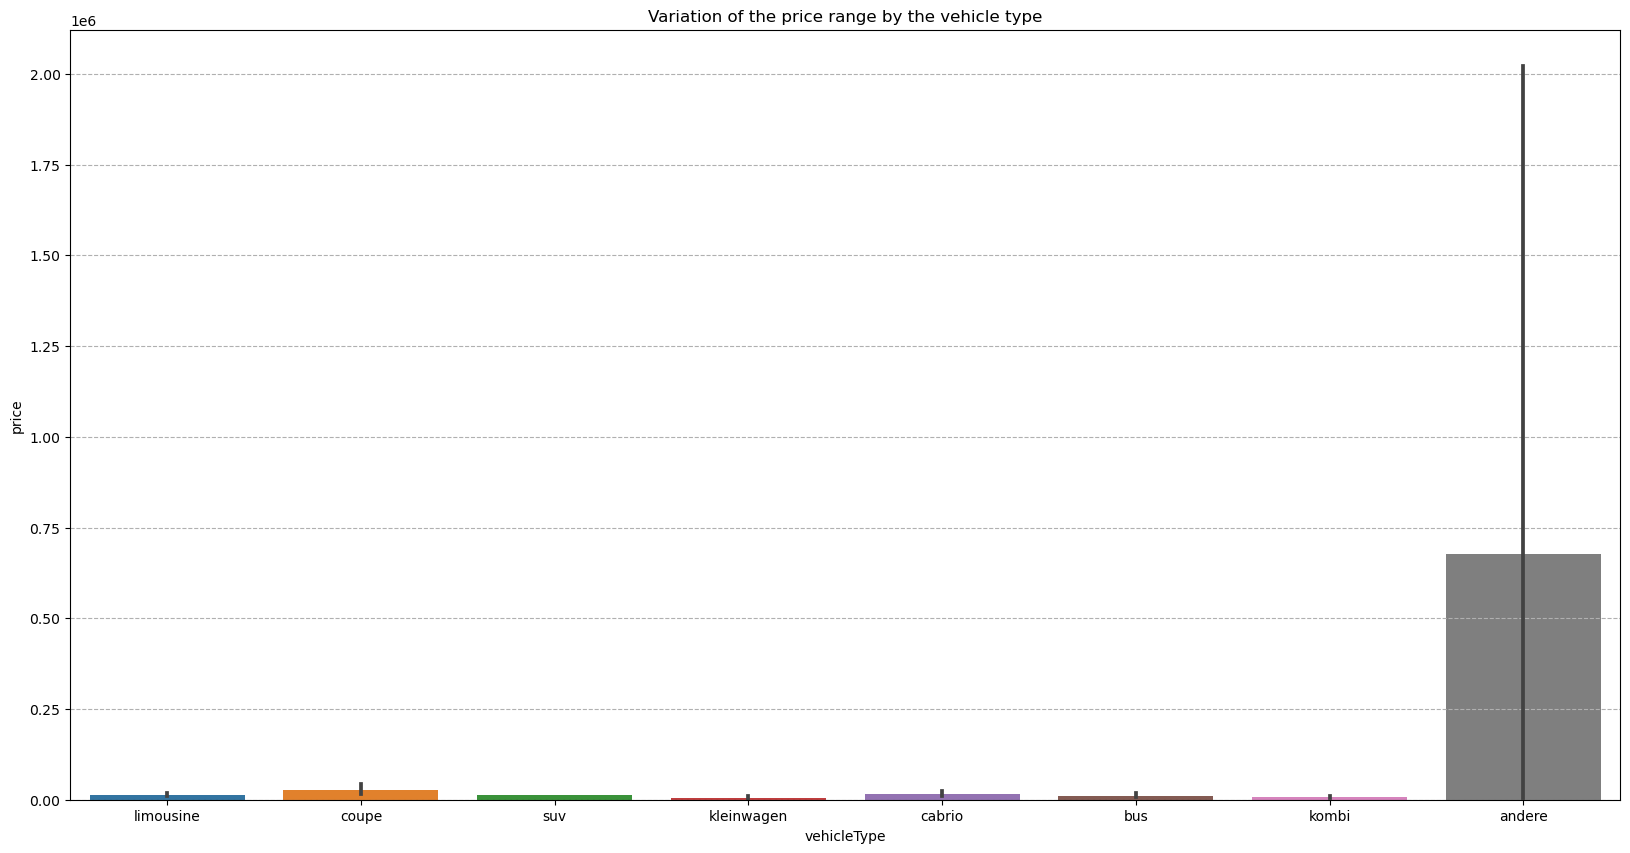

In [66]:
plt.figure(figsize=(20, 10))
sns.barplot(data=datac, x=datac["vehicleType"],y=datac["price"])
plt.title("Variation of the price range by the vehicle type")

plt.grid(axis='y', linestyle='--')
plt.show()

### 4) Find out Total count of vehicles by type available on ebay for sale.As well as create a visualization for the client

In [19]:
datac["vehicleType"].value_counts()

limousine     133763
kleinwagen     80022
kombi          67563
bus            30201
cabrio         22898
coupe          19013
suv            14707
andere          3357
Name: vehicleType, dtype: int64

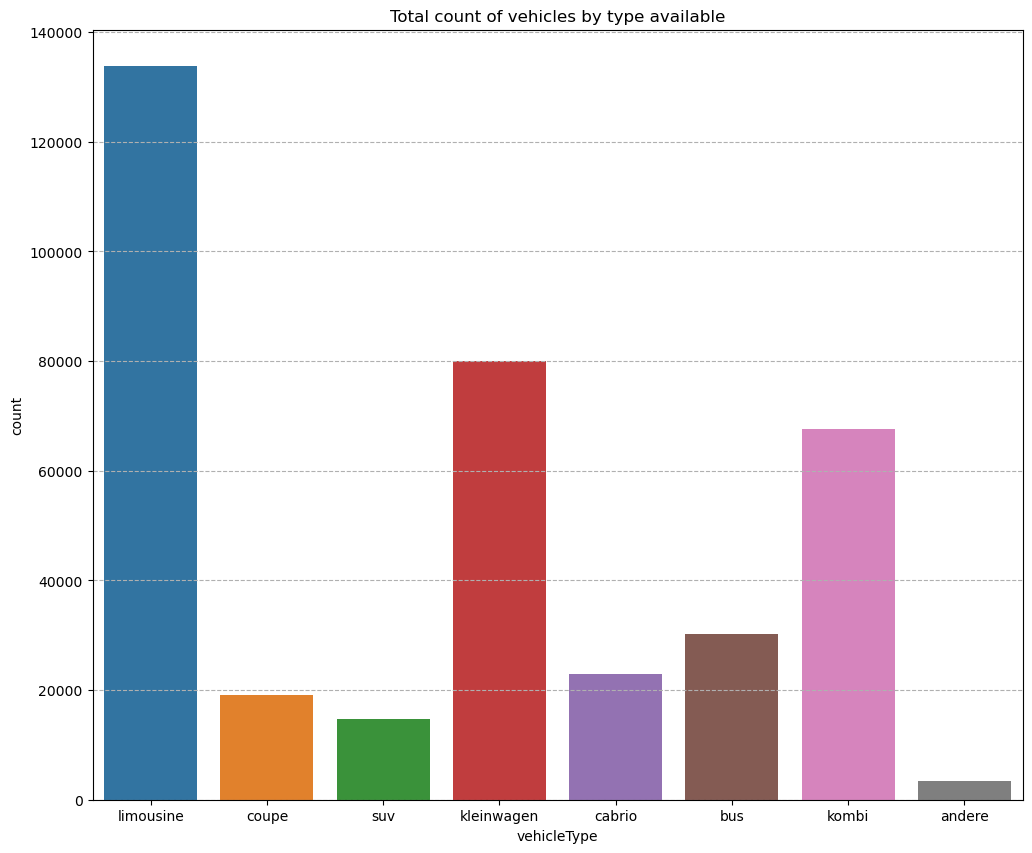

In [20]:
plt.figure(figsize=(12, 10))
sns.countplot(x=datac["vehicleType"])
plt.title("Total count of vehicles by type available")

plt.grid(axis='y', linestyle='--')
plt.show()

### 5) Is there any relationship between dollar_price and kilometer? (Explain with appropriate analysis)

In [21]:
datac[["price","kilometer"]].corr(method="spearman")

,price,kilometer
price,1.00000,-0.37305
kilometer,-0.37305,1.00000


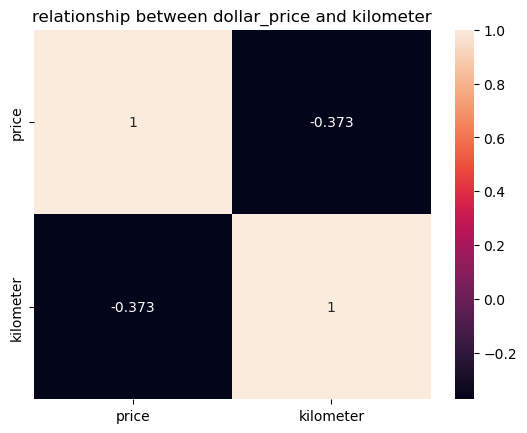

In [22]:
sns.heatmap(datac[["price","kilometer"]].corr(method="spearman"),annot=True,fmt='.3g')
plt.title("relationship between dollar_price and kilometer")
plt.show()

## Analysis-2

### 1) Can you tell me No of Vehicles by Brand Available on ebay for sale with the help of visualization

In [23]:
datac["brand"].value_counts()

volkswagen        79639
bmw               40274
opel              40136
mercedes_benz     35307
audi              32873
ford              25573
renault           17969
peugeot           11027
fiat               9676
seat               7022
mazda              5695
skoda              5641
smart              5249
citroen            5182
nissan             5037
toyota             4694
sonstige_autos     3982
hyundai            3646
mini               3394
volvo              3327
mitsubishi         3061
honda              2836
kia                2555
alfa_romeo         2345
suzuki             2327
porsche            2215
chevrolet          1845
chrysler           1452
dacia               900
jeep                807
daihatsu            806
subaru              779
land_rover          770
jaguar              621
trabant             591
daewoo              542
saab                530
rover               490
lancia              484
lada                225
Name: brand, dtype: int64

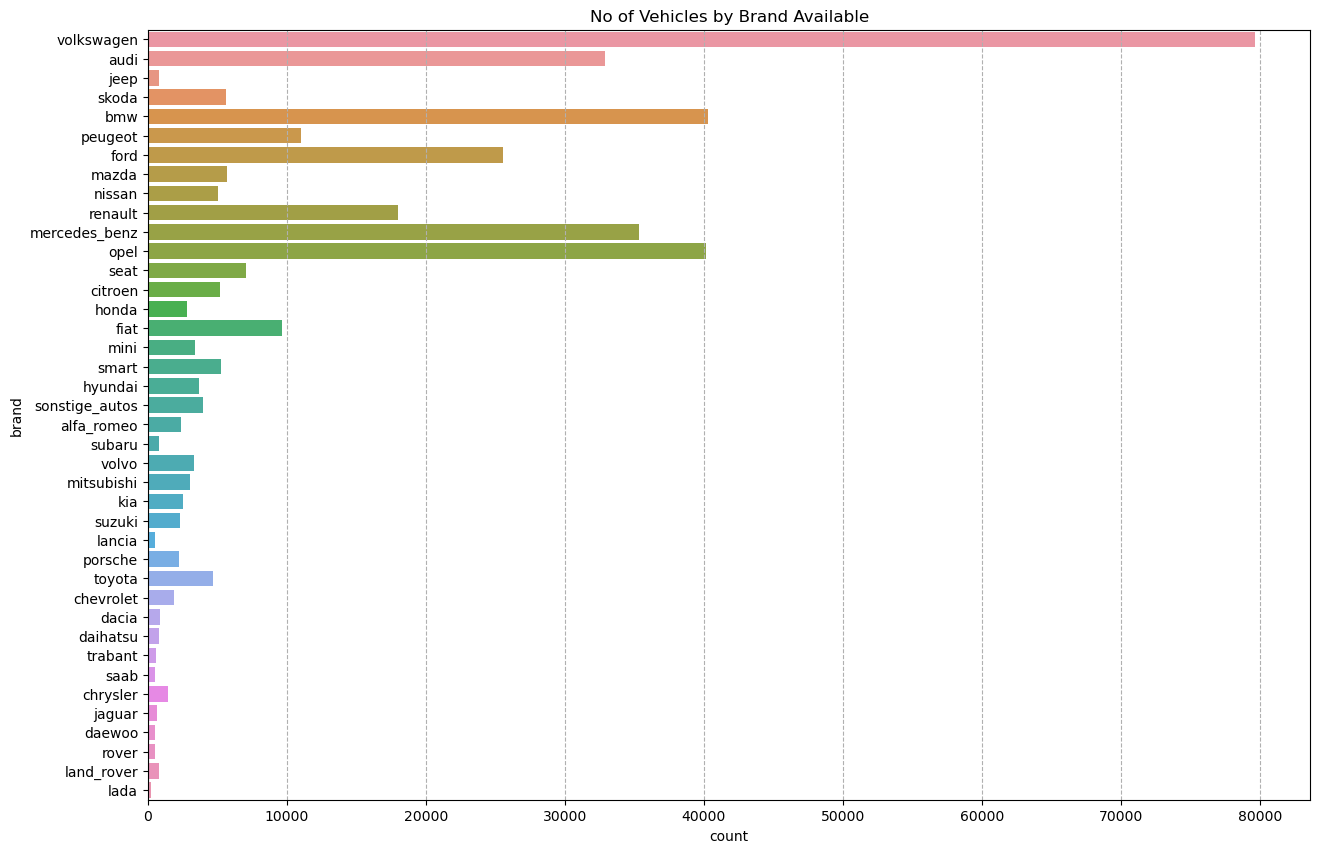

In [86]:
plt.figure(figsize=(15, 10))
sns.countplot(data=datac,y=datac["brand"])
plt.title("No of Vehicles by Brand Available")
plt.grid(axis='x', linestyle='--')
plt.show()

### 2) What is the Average price for vehicles based on the type of vehicle as well as on the type of gearbox.Explain me with both numerical and visualization analysis

In [25]:
datax=datac.groupby(["vehicleType","gearbox"])

In [26]:
datax["price"].mean()

vehicleType  gearbox  
andere       automatik      7366.861496
             manuell      758055.365154
bus          automatik     10599.265713
             manuell       10244.418314
cabrio       automatik     16254.374208
             manuell       14674.193796
coupe        automatik     35510.948175
             manuell       21561.150169
kleinwagen   automatik      3889.552200
             manuell        5843.002110
kombi        automatik      8910.045892
             manuell        7323.853762
limousine    automatik     17375.917378
             manuell       12641.186224
suv          automatik     16764.091774
             manuell        9913.012436
Name: price, dtype: float64

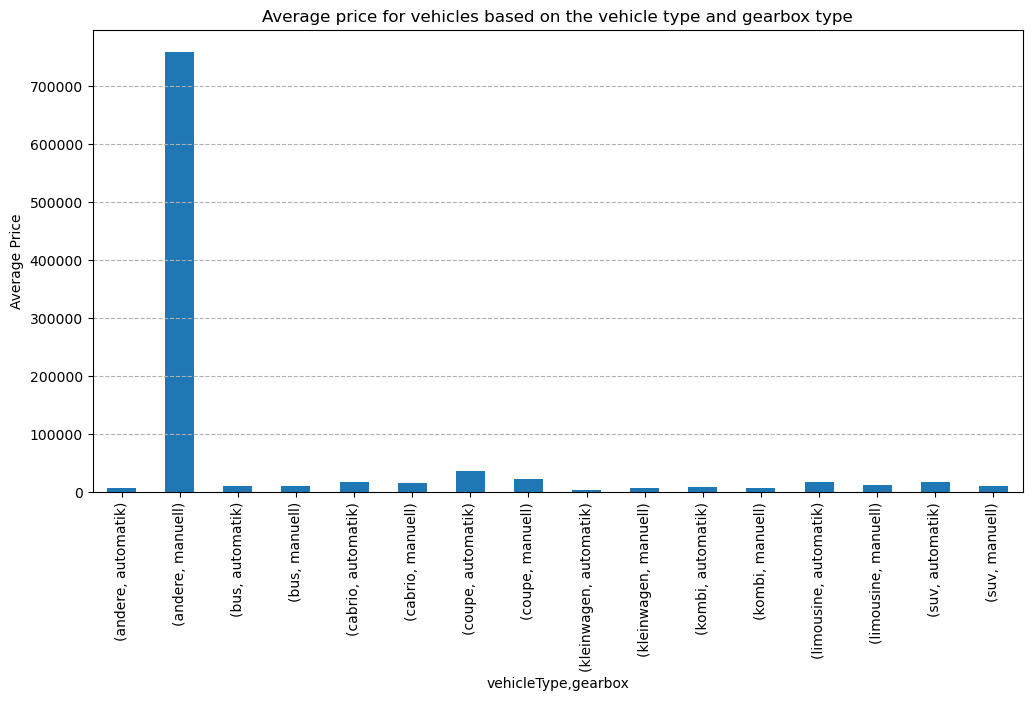

In [74]:
plt.figure(figsize=(12, 6))
(datax["price"].mean()).plot(kind="bar")
plt.title("Average price for vehicles based on the vehicle type and gearbox type")
plt.ylabel("Average Price")
plt.grid(axis='y', linestyle='--') 
plt.show()

### 3) What is the marginal probability of private seller

In [52]:
pd.crosstab(index=(datac["seller"]=="privat"),columns=(datac["seller"]=="gewerblich"),margins=True,rownames=["privat"],colnames=["gewerblich"],normalize=True)

gewerblich,False,True,All
privat,,,
False,0.000000,0.000008,0.000008
True,0.999992,0.000000,0.999992
All,0.999992,0.000008,1.000000


## Analysis-3

### 1) The memory usage of the data is around 6.1 mb.How can we reduce the memory usage of the data set?

In [29]:
datac.drop(["dateCrawled","postalCode","lastSeen"],axis=1,inplace=True)

In [30]:
datac["kilometer"]=datac["kilometer"].astype(np.uint32)
datac["yearOfRegistration"]=datac["yearOfRegistration"].astype(np.uint16)
datac["powerPS"]=datac["powerPS"].astype(np.uint16)
datac["price"]=datac["price"].astype(np.uint32)
datac["monthOfRegistration"]=datac["monthOfRegistration"].astype(np.uint8)

In [31]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371524 entries, 0 to 371527
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   name                 371524 non-null  object        
 1   seller               371524 non-null  object        
 2   offerType            371524 non-null  object        
 3   price                371524 non-null  uint32        
 4   abtest               371524 non-null  object        
 5   vehicleType          371524 non-null  object        
 6   yearOfRegistration   371524 non-null  uint16        
 7   gearbox              371524 non-null  object        
 8   powerPS              371524 non-null  uint16        
 9   model                371524 non-null  object        
 10  kilometer            371524 non-null  uint32        
 11  monthOfRegistration  371524 non-null  uint8         
 12  fuelType             371524 non-null  object        
 13  brand         

### 2) What is the Average price of vehicle by fuel type and gearbox type.Give a plot

In [32]:
datay=datac.groupby(["fuelType","gearbox"])

In [33]:
datay["price"].mean()

fuelType  gearbox  
andere    automatik    8.434172e+03
          manuell      1.199950e+07
benzin    automatik    1.185217e+04
          manuell      1.139948e+04
cng       automatik    6.737718e+03
          manuell      4.517496e+03
diesel    automatik    1.881035e+04
          manuell      8.536107e+03
elektro   automatik    2.290028e+04
          manuell      3.822320e+03
hybrid    automatik    1.528196e+04
          manuell      1.161313e+04
lpg       automatik    2.219599e+04
          manuell      3.236602e+03
Name: price, dtype: float64

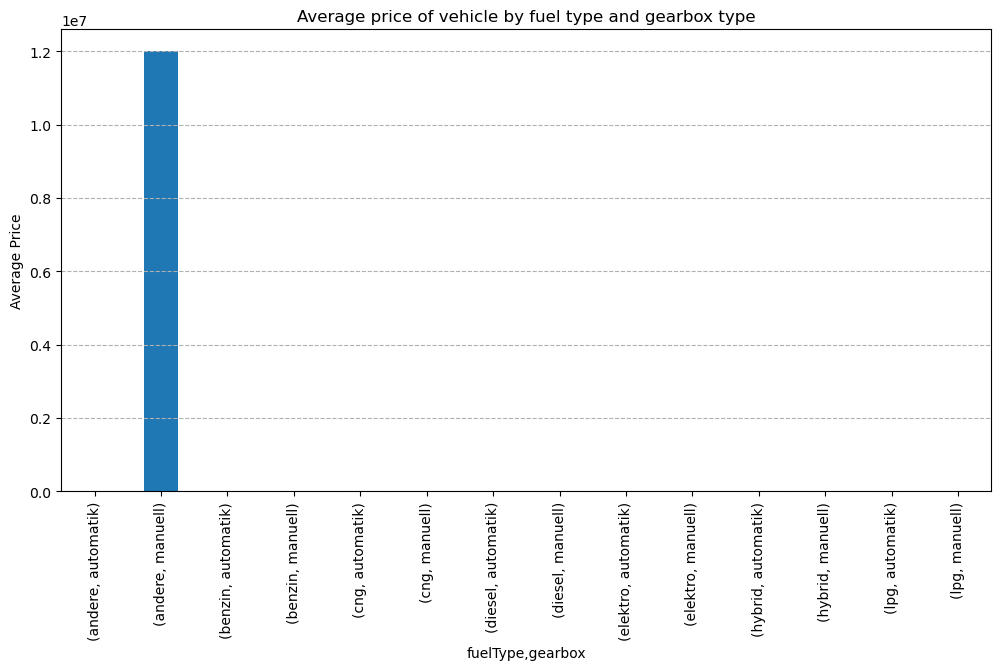

In [87]:
plt.figure(figsize=(12, 6))
(datay["price"].mean()).plot(kind="bar")
plt.title("Average price of vehicle by fuel type and gearbox type")
plt.ylabel("Average Price")
plt.grid(axis='y', linestyle='--')
plt.show()

### 3) What is the Average power of a vehicle by vehicle type and gearbox type.Give a plot

In [35]:
datax["powerPS"].mean()

vehicleType  gearbox  
andere       automatik    124.922438
             manuell       99.375501
bus          automatik    140.884166
             manuell      108.204303
cabrio       automatik    188.922414
             manuell      130.729464
coupe        automatik    218.723713
             manuell      151.884799
kleinwagen   automatik     75.040381
             manuell       68.242905
kombi        automatik    174.859625
             manuell      122.672793
limousine    automatik    173.118946
             manuell       98.866436
suv          automatik    210.521964
             manuell      123.911232
Name: powerPS, dtype: float64

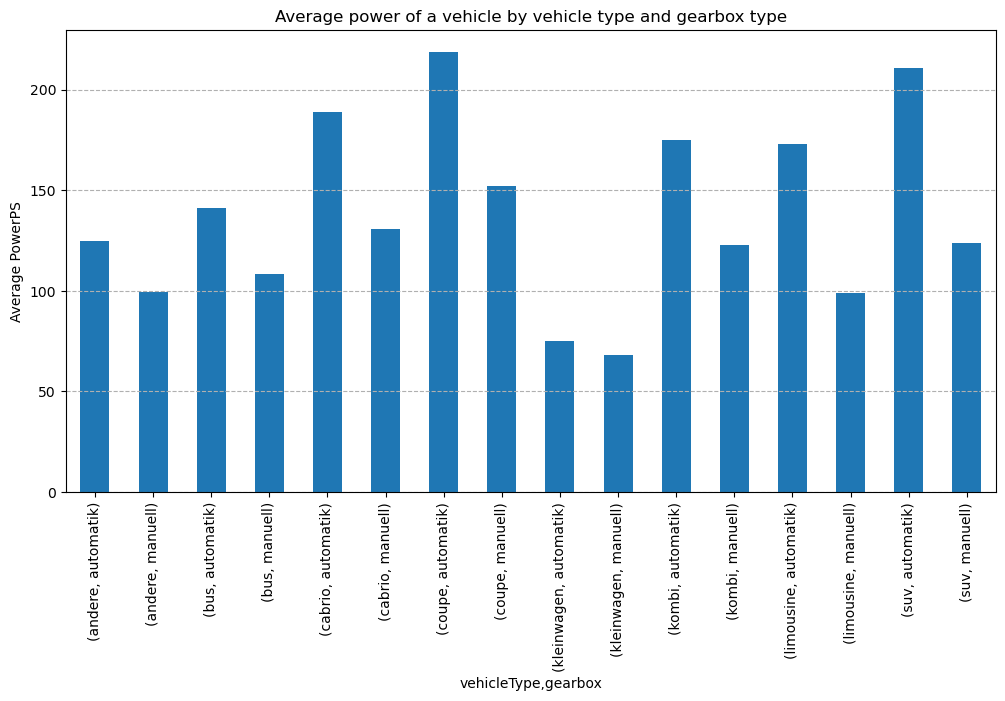

In [72]:
plt.figure(figsize=(12, 6))
(datax["powerPS"].mean()).plot(kind="bar")
plt.title("Average power of a vehicle by vehicle type and gearbox type")
plt.ylabel("Average PowerPS")
plt.grid(axis='y', linestyle='--')
plt.show()

### 4) What is the Average price of a vehicle by brand as well as vehicle type.Use heatmap to explain this

In [37]:
dataz=datac.groupby(["brand","vehicleType"])

In [38]:
dataz["price"].mean()

brand       vehicleType
alfa_romeo  andere          3153.333333
            cabrio          9147.179487
            coupe           6897.190083
            kleinwagen      4466.242678
            kombi           3580.161926
                               ...     
volvo       coupe           6040.930556
            kleinwagen      3912.714286
            kombi           3583.711310
            limousine      18840.519164
            suv            15269.577465
Name: price, Length: 297, dtype: float64

In [39]:
average_price=pd.DataFrame(pd.crosstab(index=datac["brand"],columns=datac["vehicleType"],values=datac["price"],aggfunc=["mean"]))
average_price.fillna(0,inplace=True)
average_price

mean                                             \
vehicleType           andere           bus        cabrio          coupe   
brand                                                                     
alfa_romeo      3.153333e+03      0.000000   9147.179487    6897.190083   
audi            9.768120e+04   3485.000000  13441.196564   16341.915486   
bmw             2.686439e+03  27569.884615  38010.594552   32097.647113   
chevrolet       1.003280e+04   6189.300000  24026.621622   16317.023438   
chrysler        8.888333e+03   2630.515982   4324.531120    9174.240000   
citroen         3.521024e+03   4409.132179   4536.408696    2695.552632   
dacia           4.450000e+03   8606.700000      0.000000       0.000000   
daewoo          9.938000e+02   1262.777778    900.000000     428.625000   
daihatsu        1.075000e+03   1201.500000   7761.000000       0.000000   
fiat            3.534768e+03   4014.823460   6485.634286    3801.477778   
ford            4.089282e+03   6028.413458   5471.103125    8217.211306   
honda           2.417000e+03   4551.638554   5336.653846    3065.749380   
hyundai         3.435571e+03   4886.926923    550.000000    4887.628440   
jaguar          0.000000e+00      0.000000  51938.769231   35811.528302   
jeep            1.265000e+04   7000.000000   1350.000000       0.000000   
kia             3.459040e+03   3627.381643  10000.000000    6387.666667   
lada            3.925000e+03   3500.000000   2500.000000       0.000000   
lancia          0.000000e+00   5204.721311  12305.000000    6341.642857   
land_rover      7.280000e+03      0.000000   2675.000000       0.000000   
mazda           1.798649e+03  18289.727666   5514.914376    3165.441606   
mercedes_benz   8.831185e+03  44828.192226  16172.390235   42447.124020   
mini            6.581750e+03   7616.666667  13406.804845    9165.601562   
mitsubishi      1.913393e+03   1847.366667   5265.808824    3035.977011   
nissan          5.936548e+03   4388.672956   8907.562500   10382.306878   
opel            2.661027e+03   4403.927122   4412.565111    3365.917308   
peugeot         3.210180e+03   5080.614583   4571.136795    6761.004219   
porsche         5.107222e+04      0.000000  41906.407674   78019.667939   
renault         2.884414e+03   3087.959809   4133.158126    6038.820937   
rover           2.818250e+03    450.000000   3074.102564     738.375000   
saab            1.433000e+03      0.000000   5825.612903    2385.863636   
seat            2.766378e+03   7063.063830      0.000000    5551.677778   
skoda           4.706077e+03   6649.809524   7722.500000    3533.000000   
smart           3.186667e+03   1650.000000   4673.917917    3851.677419   
sonstige_autos  8.047562e+06   5248.336585  27003.938735  104686.461883   
subaru          2.616667e+03   3557.764706   8900.000000   10418.625000   
suzuki          3.598571e+03   1767.464286   2309.361111    3252.500000   
toyota          5.477727e+03   6261.194690   5771.323077    5341.879032   
trabant         2.697000e+03      0.000000   5799.486486    3275.000000   
volkswagen      1.329010e+05   9237.313188   6548.038610   14854.182493   
volvo           1.364000e+04      0.000000  10665.802469    6040.930556   

                                                                         
vehicleType        kleinwagen         kombi     limousine           suv  
brand                                                                    
alfa_romeo        4466.242678   3580.161926  64882.923913      0.000000  
audi              7358.435834  17069.568857  15122.772555  24599.234542  
bmw               4432.658696   9001.496376   9917.253074  15924.963470  
chevrolet         3029.557461   4899.090090   8056.390957   9830.491228  
chrysler          3124.833333   4867.845528   3618.367442   5888.391304  
citroen           3029.278894   3724.929022  25013.264706  10810.540541  
dacia             4878.726457   4166.642857   3648.571429   9761.972093  
daewoo            1110.324627    816.340426    921.221622 

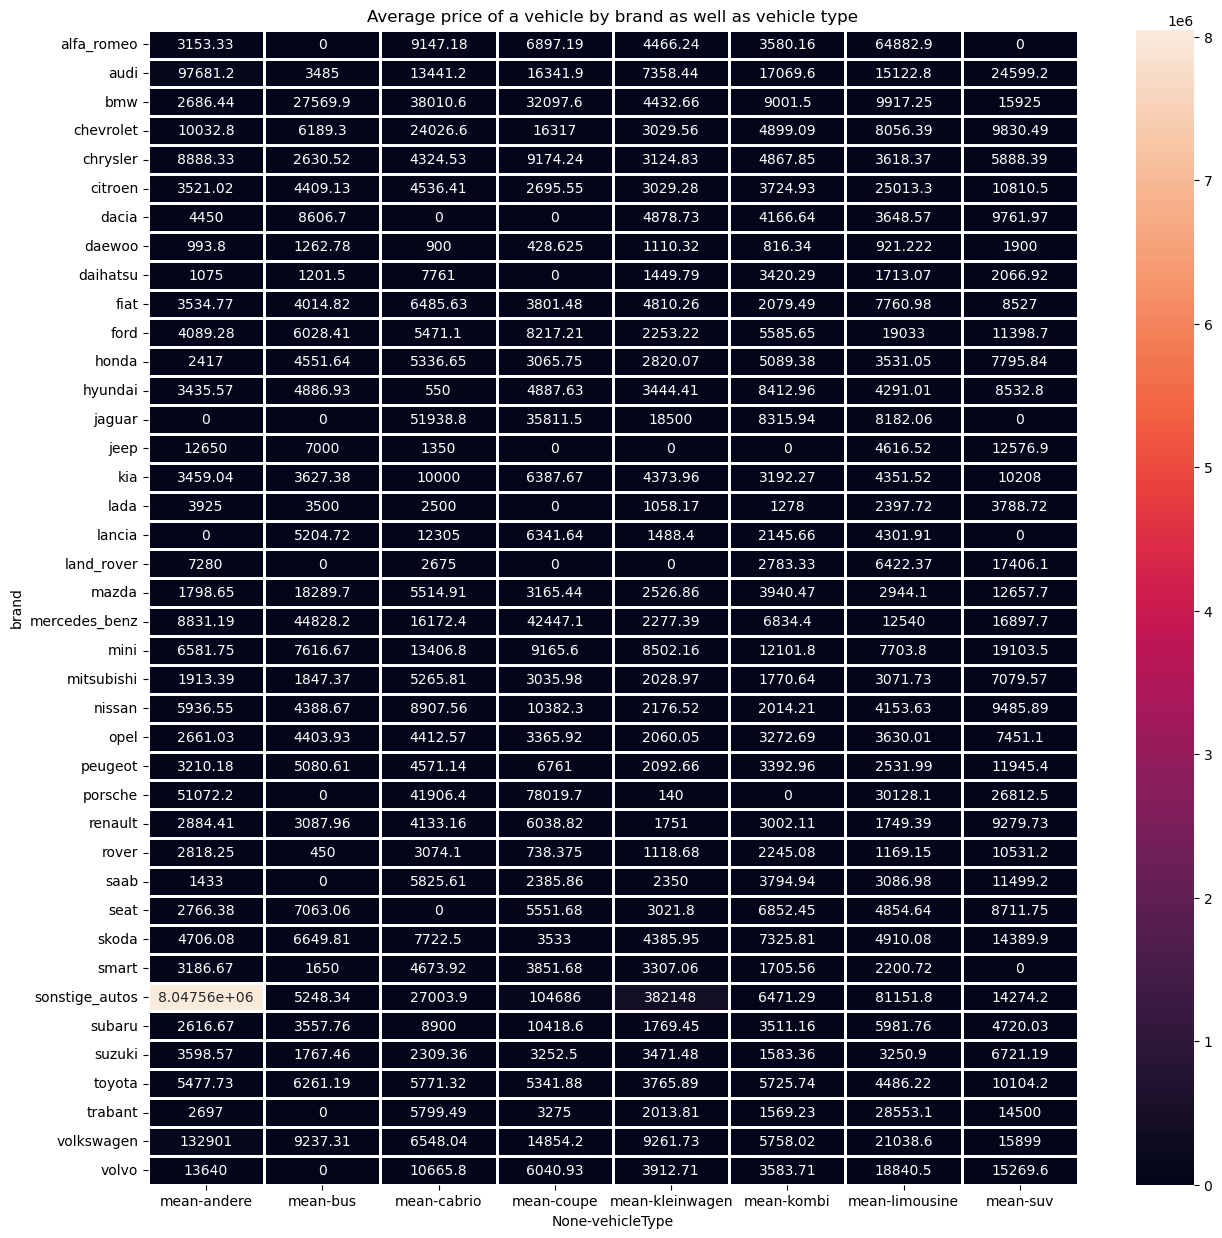

In [58]:
plt.figure(figsize=(15, 15))
sns.heatmap(data=average_price,annot=True,fmt='.6g',linewidths=1,linecolor='white')
plt.title("Average price of a vehicle by brand as well as vehicle type")
plt.show()